# Bank Customer churn indicator
---
1. Understanding the Problem Statement
2. Data Collection
3. Data Checks to perform
4. Exploratory data analysis
5. Data Pre-Processing
6. Model Training
7. Choose best model

---
## 1. Problem Statement
- This project understands how a customer’s churn behavior (whether they leave the bank or not) is influenced by other variables such as Gender, Age, Tenure, Balance, Number of Products, Credit Score, and whether they have a Credit Card, are an Active Member, or have a certain Estimated Salary.



## 2. Data Collection
- **Data Source -** <a href="https://mavenanalytics.io/data-playground?dataStructure=Single%20table&order=date_added%2Cdesc&search=Bank">https://mavenanalytics.io/data-playground?dataStructure=Single%20table&order=date_added%2Cdesc&search=Bank</a>
- Data contains **13 Columns** and **10000 Rows**



### 2.1 Importing Data and Required Libraries
- Importing libraries like Numpy, Pandas, Matplotlib and Seaborn.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
sns.set_palette("pastel")
sns.set_style("darkgrid")

In [4]:
df = pd.read_csv('data/raw.csv')
df.shape

(10000, 13)

#### Previewing Data

In [5]:
df.sample(5)

,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,isActiveMember,EstimatedSalary,Exited
8768,15784597,Lattimore,648,France,Male,26,9,162924,1,1,0,98368,0
391,15576022,Nwachinemelu,565,France,Male,38,5,0,2,0,1,80630,0
4889,15688007,Liu,703,Spain,Male,20,3,165261,1,1,1,41627,0
9654,15807107,Patel,612,France,Male,32,3,121394,1,1,0,164081,0
7992,15765532,Horton,612,Germany,Male,76,6,96167,1,1,1,191393,0


#### Shape of DataSet

In [6]:
df.shape

(10000, 13)

### 2.2 Dataset Information

- **CustomerId -** A unique identifier for each customer
- **Surname -** The customer's last name
- **CreditScore -** A numerical value representing the customer's credit score
- **Geography -** The country where the customer resides (France, Spain or Germany)
- **Gender -** The customer's gender (Male or Female)
- **Age -** The customer's age
- **Tenure -** The number of years the customer has been with the bank
- **Balance -** The customer's account balance
- **NumOfProducts -** The number of bank products the customer uses (e.g., savings account, credit card)
- **HasCrCard -** Whether the customer has a credit card (1 = yes, 0 = no)
- **IsActiveMember -** Whether the customer is an active member (1 = yes, 0 = no)
- **EstimatedSalary -** The estimated salary of the customer
- **Exited -** Whether the customer has churned (1 = yes, 0 = no)


## 3. Data Check to Perform

- 3.1. Check Missing values
- 3.2. Check Duplicates
- 3.3. Check Data-types
- 3.4. Check the number of unique values of each column
- 3.5. Check statistics of dataset
- 3.6. Check various categories present in the different categorical column

### 3.1 Check Missing Values

In [7]:
df.isna().sum()

CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
isActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

Look like there is a No missing values in the Dataset

### 3.2 Check Duplicates

In [8]:
df.duplicated().sum()

0

There is no duplicated values in the Dataset

### 3.3 Check Data-Types

In [9]:
df.dtypes

CustomerId          int64
Surname            object
CreditScore         int64
Geography          object
Gender             object
Age                 int64
Tenure              int64
Balance             int64
NumOfProducts       int64
HasCrCard           int64
isActiveMember      int64
EstimatedSalary     int64
Exited              int64
dtype: object

Looking like Dataset has some incorrect data types that need to be corrected for proper analysis

In [10]:
df['Exited'] = df['Exited'].astype('bool')
df['isActiveMember'] = df['isActiveMember'].astype('bool')
df['HasCrCard'] = df['HasCrCard'].astype('bool')
df['Age'] = df['Age'].astype('int8')
df['NumOfProducts'] = df['NumOfProducts'].astype('int8')
df.dtypes

CustomerId          int64
Surname            object
CreditScore         int64
Geography          object
Gender             object
Age                  int8
Tenure              int64
Balance             int64
NumOfProducts        int8
HasCrCard            bool
isActiveMember       bool
EstimatedSalary     int64
Exited               bool
dtype: object

### 3.4 Check the number of unique values of each column

In [11]:
df.nunique()

CustomerId         10000
Surname             2932
CreditScore          460
Geography              3
Gender                 2
Age                   70
Tenure                11
Balance             6201
NumOfProducts          4
HasCrCard              2
isActiveMember         2
EstimatedSalary     9758
Exited                 2
dtype: int64

### 3.5 Check statistics of dataset

In [12]:
df.describe()

,CustomerId,CreditScore,Age,Tenure,Balance,NumOfProducts,EstimatedSalary
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,1.569094e+07,650.528800,38.921800,5.012800,76485.896300,1.530200,100090.241500
std,7.193619e+04,96.653299,10.487806,2.892174,62397.411085,0.581654,57510.492352
min,1.556570e+07,350.000000,18.000000,0.000000,0.000000,1.000000,12.000000
25%,1.562853e+07,584.000000,32.000000,3.000000,0.000000,1.000000,51002.000000
50%,1.569074e+07,652.000000,37.000000,5.000000,97198.500000,1.000000,100193.500000
75%,1.575323e+07,718.000000,44.000000,7.000000,127644.000000,2.000000,149388.000000
max,1.581569e+07,850.000000,92.000000,10.000000,250898.000000,4.000000,199992.000000


as per above statistics we found these insights,
- Bank has customers between **18 year to 92 year**, with average age of around **39 years**.
- Over 25% of the bank's customers maintain a zero balance in their accounts, indicating a significant portion of inactive or underutilized accounts.
- average *Tenure* with the bank is around **5 years**, define moderate customer retention.
- More than 75% of the bank accounts has 1 or 2 Bank products

### 3.6 Check various categories present in the different categorical column

In [13]:
df['Geography'].unique()

array(['Spain', 'France', 'Germany'], dtype=object)

All of the Bank account belong to Spain, France and Germany, this means Bank of this dataset should be belong from Europe and uses EURO(€) as currency.

In [14]:
df['Surname'].unique()

array(['Ferri', 'Akobundu', 'Cattaneo', ..., 'McDaniels', 'Guidry',
       'Moysey'], dtype=object)

## 4. Exploratory Data Analysis

- 4.1. Histogram & KDE

### 4.1 Churn-rate distribution

#### 4.1.1 Churn rate distibution by Gender

c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


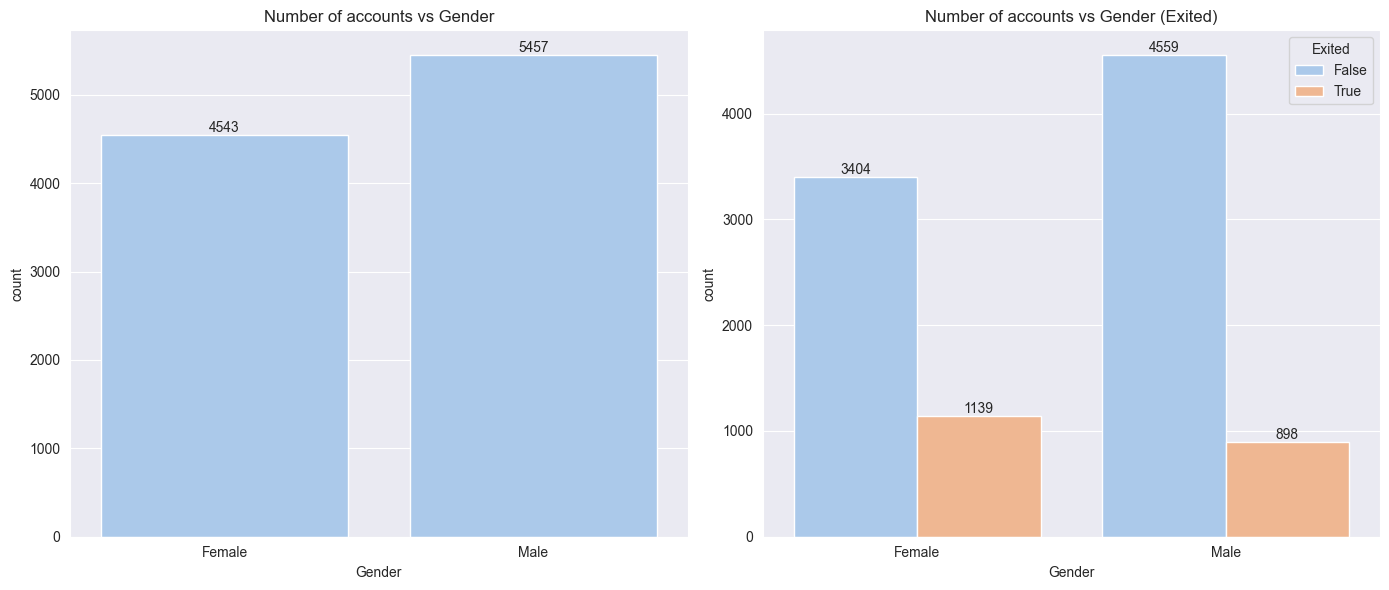

In [15]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# First subplot: Same as the original
sns.countplot(x='Gender', data=df, ax=axes[0])
for bars in axes[0].containers:
    axes[0].bar_label(bars)
axes[0].set_title('Number of accounts vs Gender')

# Second subplot: With hue="Exited"
sns.countplot(x='Gender', hue='Exited', data=df, ax=axes[1])
for bars in axes[1].containers:
    axes[1].bar_label(bars)
axes[1].set_title('Number of accounts vs Gender (Exited)')

plt.tight_layout()
plt.show()

In [16]:
print('Female Churn Rate -',round(1139/4543,6) * 100,'%')
print('Male Churn Rate -',round(898/4543,6) * 100,'%')

Female Churn Rate - 25.0715 %
Male Churn Rate - 19.7667 %


**Insights :** 
- Male customers has more account compare to Female customers.
- Female customers have a higher churn rate of **25.07%**, compared to **19.77%** for male customers.

#### 4.1.2 Churn rate distribution by Gender and Geography

c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

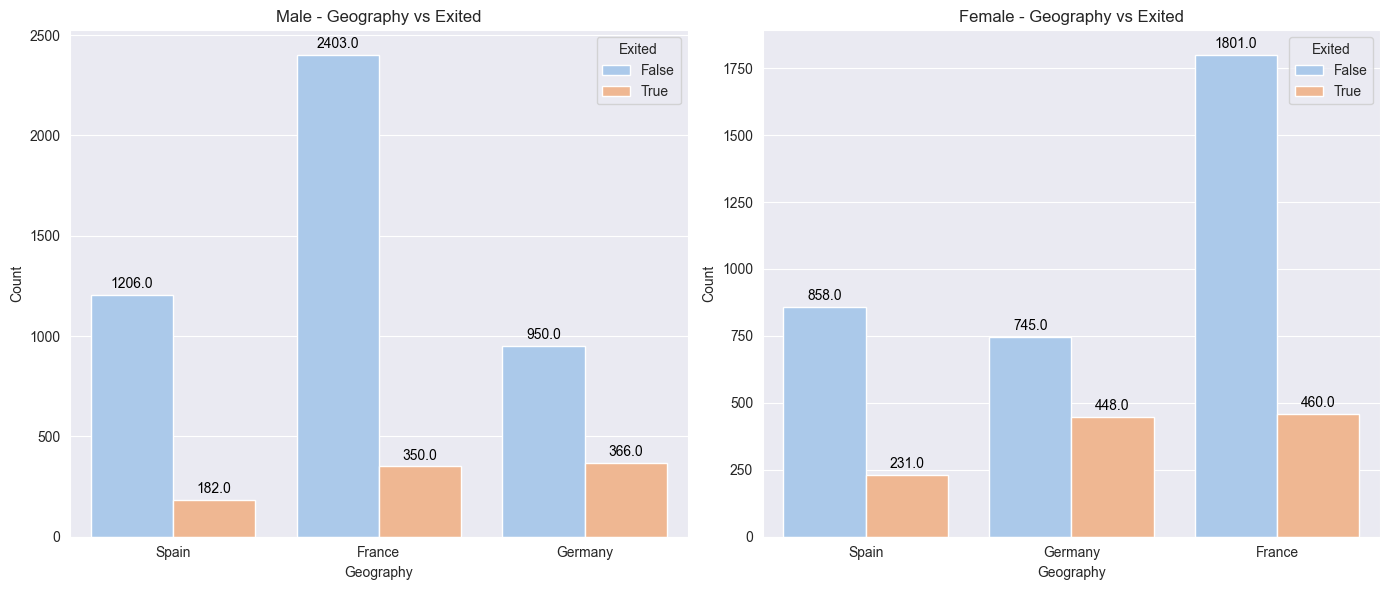

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Male plots
sns.countplot(x='Geography', hue='Exited', data=df[df['Gender'] == 'Male'], ax=axes[0])
axes[0].set_title('Male - Geography vs Exited')
axes[0].set_xlabel('Geography')
axes[0].set_ylabel('Count')
for p in axes[0].patches:
    if p.get_height() > 0:
        axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                            textcoords='offset points')


# Female plots
sns.countplot(x='Geography', hue='Exited', data=df[df['Gender'] == 'Female'], ax=axes[1])
axes[1].set_title('Female - Geography vs Exited')
axes[1].set_xlabel('Geography')
axes[1].set_ylabel('Count')
for p in axes[1].patches:
    if p.get_height() > 0:
        axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                            textcoords='offset points')

plt.tight_layout()
plt.show()

In [18]:
geo_df = df.groupby('Geography')['Exited'].agg(['count','sum'])
geo_df['Churn Rate'] = geo_df['sum'] / geo_df['count']
geo_df

,count,sum,Churn Rate
Geography,,,
France,5014,810,0.161548
Germany,2509,814,0.324432
Spain,2477,413,0.166734


**Insights :**
- **Germany** has **Highest Churn Rate** in compare to **France** and **Spain**
- **Spain** and **France** has almost same churn rate

                  count  sum  churn_rate
Geography Gender                        
France    Female   2261  460   20.344980
          Male     2753  350   12.713404
Germany   Female   1193  448   37.552389
          Male     1316  366   27.811550
Spain     Female   1089  231   21.212121
          Male     1388  182   13.112392


<Axes: xlabel='Geography,Gender'>

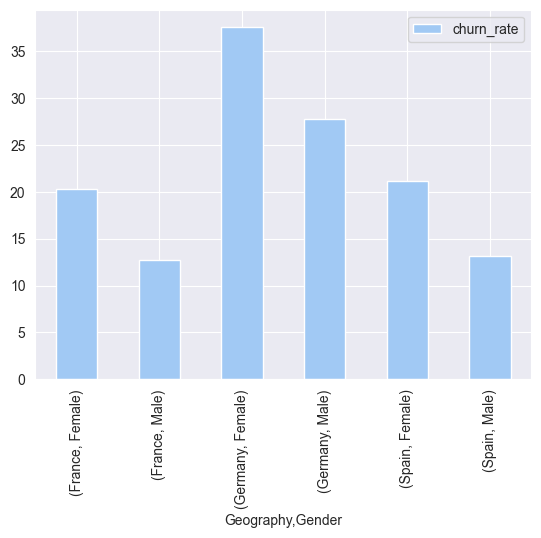

In [19]:
piv_df = df.groupby(['Geography','Gender'])['Exited'].agg(['count','sum'])
piv_df['churn_rate'] = piv_df['sum']*100 / piv_df['count']
print(piv_df)
piv_df[['churn_rate']].plot(kind='bar')

**Insights :**

- In case of Female customer, **Germany** has Highest churn rate as **37%** and **France** has Lowest churn rate as **20%**
- In case of Male customer, also **Germany** has Highest churn rate as **27%** and **France** has Lowest churn rate as **12%**
- We can see Female customer are left more in compare to Male customer, it can be due to Bank service or other reasons.

#### 4.1.3 Churn rate distribution by Age

c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


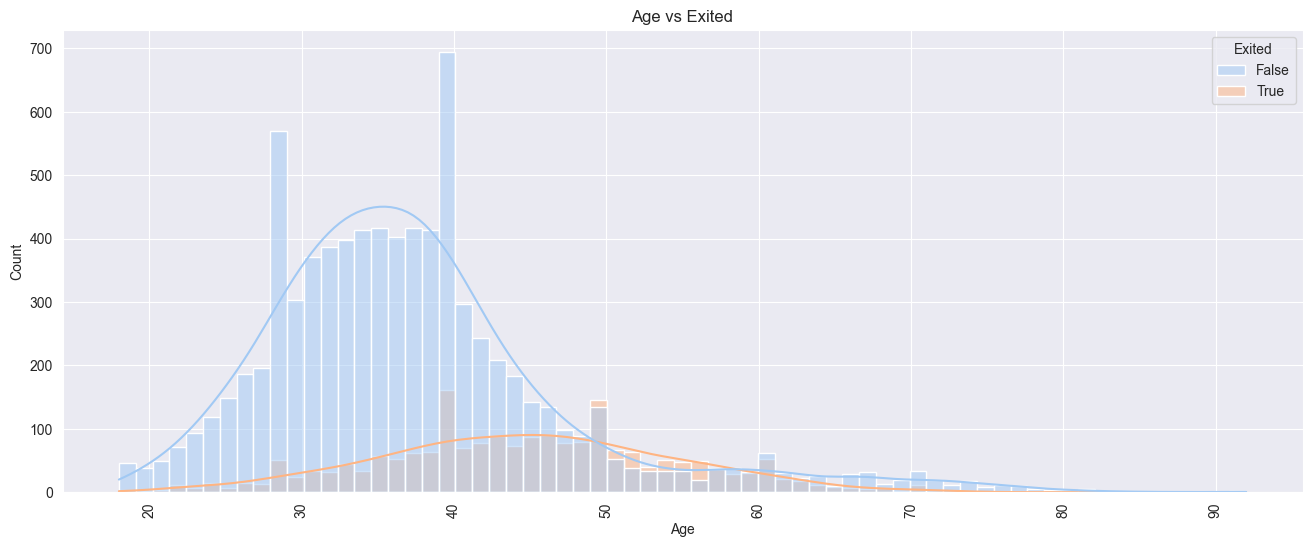

In [20]:
plt.figure(figsize=(16, 6))
sns.histplot(x='Age', hue='Exited', data=df,kde=True)
plt.title('Age vs Exited')
plt.xticks(rotation=90)
plt.show()

**Insights :**

- Customers with range of Age between **40 to 50 years** are churned most, especially Customers with 40 years and 50 years are churned more in compare to other age groups.
- The majority of the bank’s customers fall within the **25 to 45 years** age range. In particular, ages **29** and **40** are the most frequent among all customers.


#### 4.1.4 Churn rate distribution by Balance

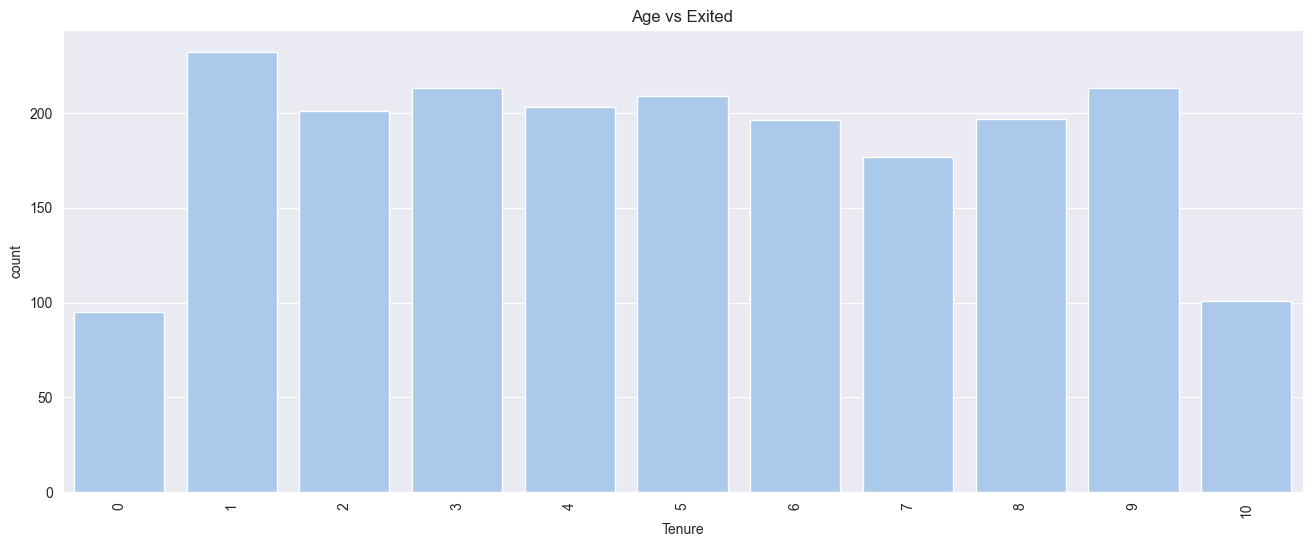

In [21]:
plt.figure(figsize=(16, 6))
sns.countplot(x='Tenure', data=df[df['Exited']==True])
plt.title('Age vs Exited')
plt.xticks(rotation=90)
plt.show()

**Insights :**

- Customers with Tenure of less than one year are Least churned
- Customers churn rate increased dominantly with a one year completed, it may be due to poor bank services.

### 4.2 Customer's Balance distibution

#### 4.2.1 Balance ditribution vs Age

<Axes: xlabel='Age'>

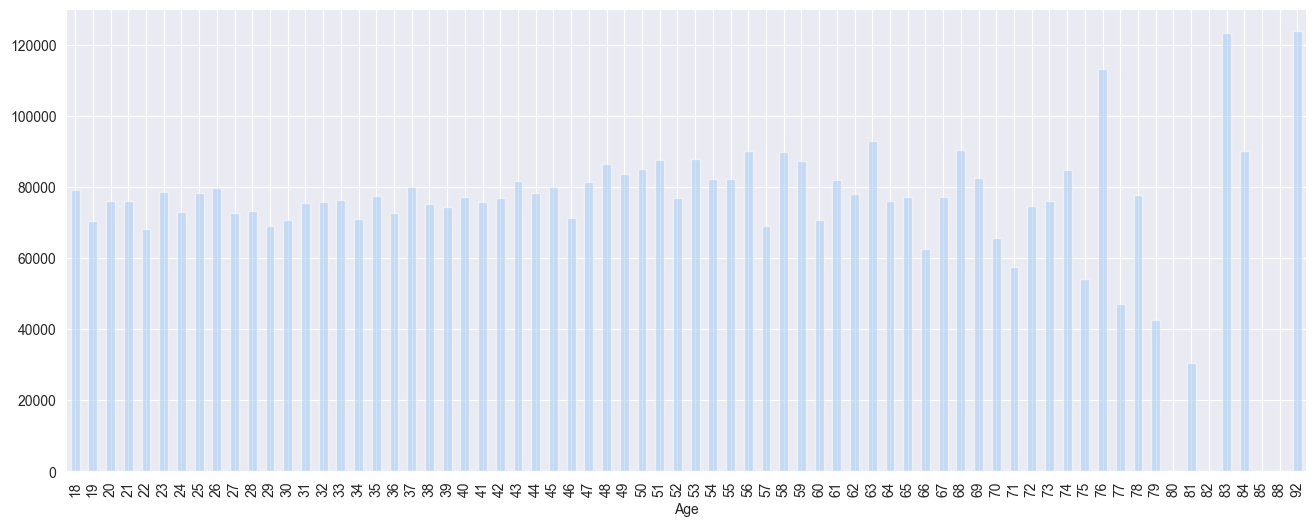

In [22]:
df.groupby('Age')['Balance'].mean().plot(kind='bar', figsize=(16, 6),alpha=0.5)

**Insights :**

- Customers with age between 40 year to 70 year have slightly higher average balance comapare to other age group.


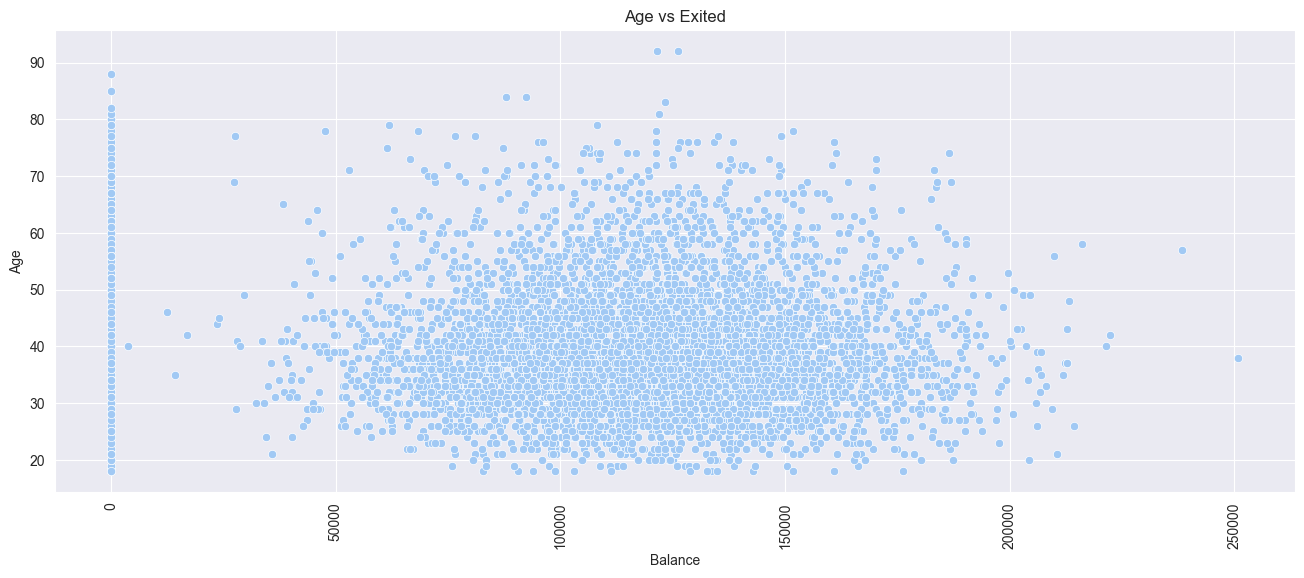

In [23]:
plt.figure(figsize=(16, 6))
sns.scatterplot(x='Balance',y='Age', data=df)
plt.title('Age vs Exited')
plt.xticks(rotation=90)
plt.show()

**Insights :**

- Customers with Age between **30 year to 50 year** are most frequent with balance between **50,000 to 20,000**.
- Accounts with 0 Balance ditributed in age between **20 to 80 year**.

#### 4.2.2 Balance distribution vs Gender

Gender
Female    75659.378604
Male      77173.979476
Name: Balance, dtype: float64


c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


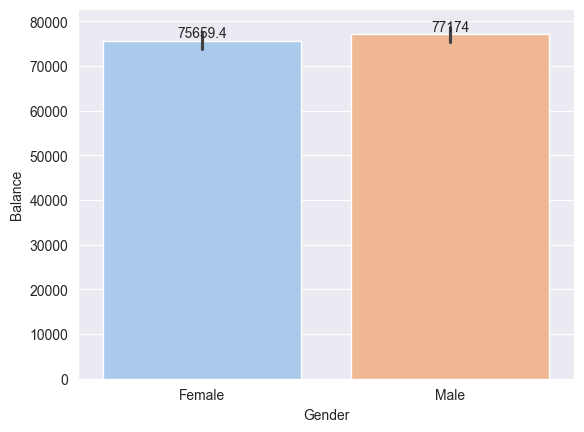

In [24]:
print(df.groupby('Gender')['Balance'].mean())
ax = sns.barplot(x='Gender',y='Balance',data=df,hue='Gender')
for bars in ax.containers:
    ax.bar_label(bars)

**Insights :**

- Male customer's accounts have slightly more average balance compare to Female customer's accounts

c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.g

Text(0.5, 1.0, 'Account Balance vs Gender')

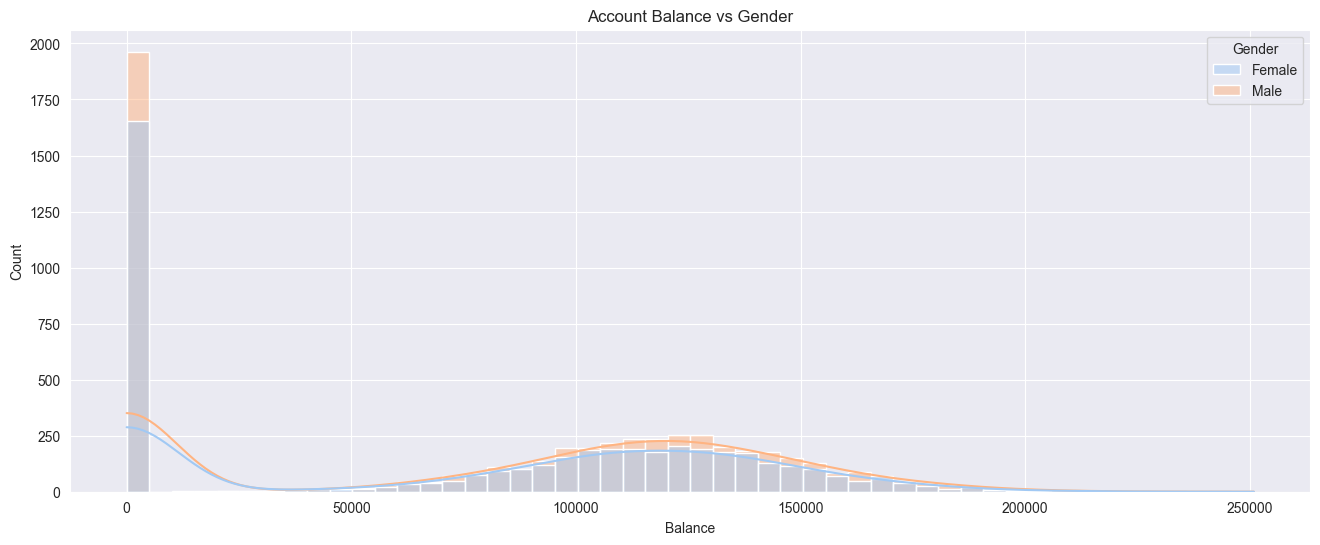

In [25]:
plt.figure(figsize=(16, 6))
sns.histplot(x='Balance', hue='Gender', data=df, kde=True,bins=50)
plt.title('Account Balance vs Gender')

**Insights :**

- Male customers have Higher number of account with **0 Balance** in comapre to Female customers.
- Accounts with Balance between **1,00,000 to 1,50,000** are the most frequent after 0 balanced accounts.
- Male cutomer's accounts have slightly higher balance in compare to Female custmer's accounts.


#### 4.2.3 Balance vs Credit Card

c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


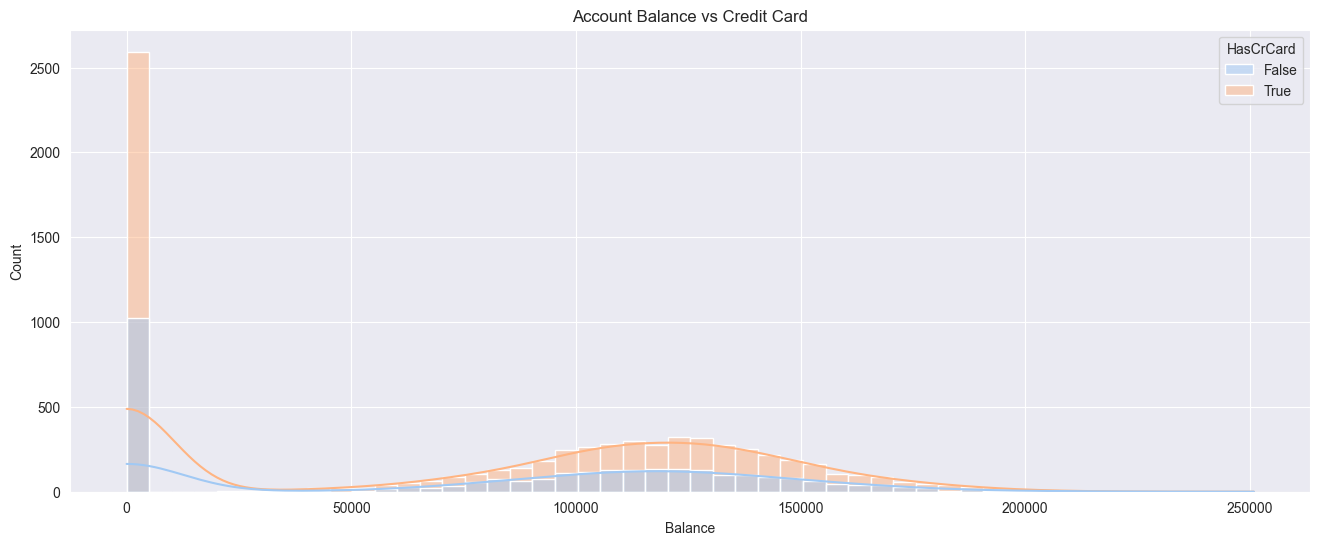

In [26]:
plt.figure(figsize=(16, 6))
sns.histplot(x='Balance', hue='HasCrCard', data=df, kde=True,bins=50)
plt.title('Account Balance vs Credit Card')
plt.show()

**Insights :**

- Accounts with 0 Balance and Credit card is most frequent.

### 4.3 Number of Accounts

#### 4.3.1 Number of Accounts vs Geography and Gender

c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


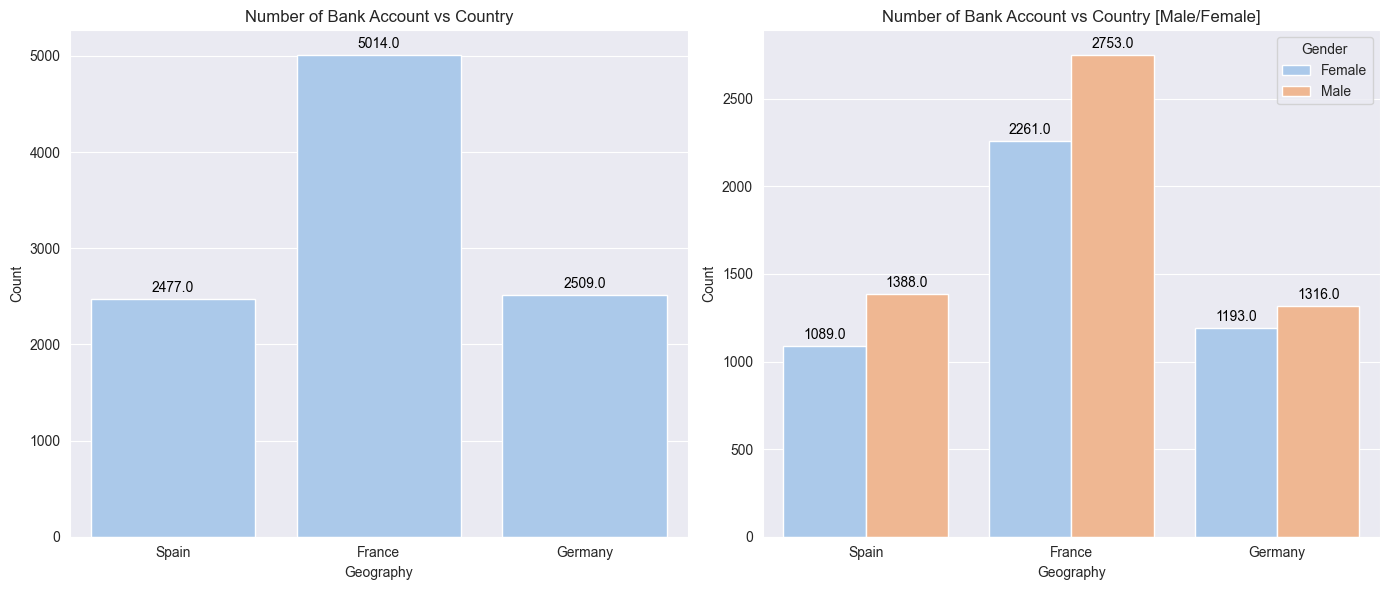

In [27]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.countplot(x='Geography', data=df, ax=axes[0])
axes[0].set_title('Number of Bank Account vs Country')
axes[0].set_xlabel('Geography')
axes[0].set_ylabel('Count')
for p in axes[0].patches:
    if p.get_height() > 0:  # Add annotation only if height > 0
        axes[0].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                         textcoords='offset points')

sns.countplot(x='Geography', data=df, ax=axes[1], hue='Gender')
axes[1].set_title('Number of Bank Account vs Country [Male/Female]')
axes[1].set_xlabel('Geography')
axes[1].set_ylabel('Count')
for p in axes[1].patches:
    if p.get_height() > 0:  # Add annotation only if height > 0
        axes[1].annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), 
                         ha='center', va='baseline', fontsize=10, color='black', xytext=(0, 5), 
                         textcoords='offset points')

plt.tight_layout()
plt.show()


**Insights :**

- **Number of Accounts -** France dominates, because France has largest number of Bank Accounts compare to Others, with **5014 Accounts**.
- **Gender Gap -** France has largest gender gap in Number of Bank Accounts, with **492 accounts** that, followed by Spain with **299 accounts**.
- **Gender Imbalance -** In case of - Number of Accounts, Spain has highest gender imbalance in contrast Germany has lowest gender imbalance.

#### 4.3.2 Number of Accounts vs Exited

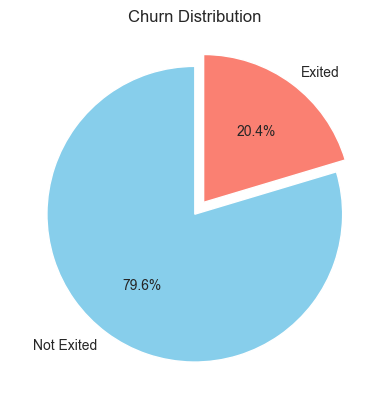

In [28]:
# sns.countplot(x='Exited',data=df)
df['Exited'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['Not Exited', 'Exited'], colors=['skyblue', 'salmon'], explode=(0, 0.1))
plt.ylabel('')
plt.title('Churn Distribution')
plt.show()

**Insights :**

- Overall Churn rate of bank is **20.4 %**

#### 4.3.4 Number of Accounts vs Has Credit card or not

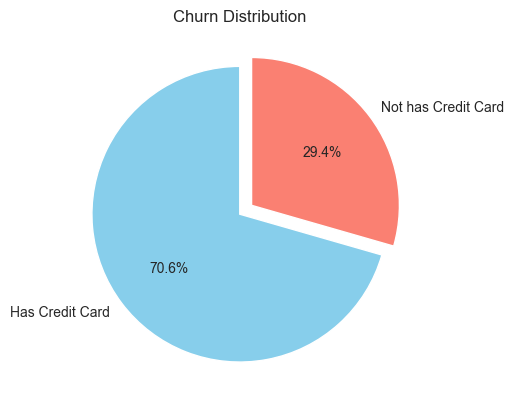

HasCrCard
True     7055
False    2945
Name: count, dtype: int64

In [29]:
df['HasCrCard'].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, labels=['Has Credit Card', 'Not has Credit Card'], colors=['skyblue', 'salmon'], explode=(0, 0.1))
plt.ylabel('')
plt.title('Churn Distribution')
plt.show()
df['HasCrCard'].value_counts()

**Insights :**

- Overall **70 %** of Customer has Credit card.

#### 4.3.5 Number of Accounts vs Active or not

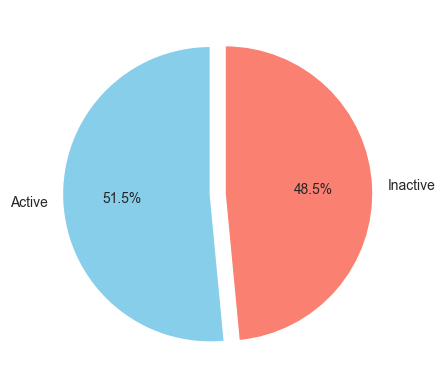

isActiveMember
True     5151
False    4849
Name: count, dtype: int64

In [30]:
plt.pie(df['isActiveMember'].value_counts(), labels=['Active', 'Inactive'], autopct='%1.1f%%', startangle=90, colors=['skyblue', 'salmon'], explode=(0, 0.1))
plt.show()
df['isActiveMember'].value_counts()


c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Geography', ylabel='count'>

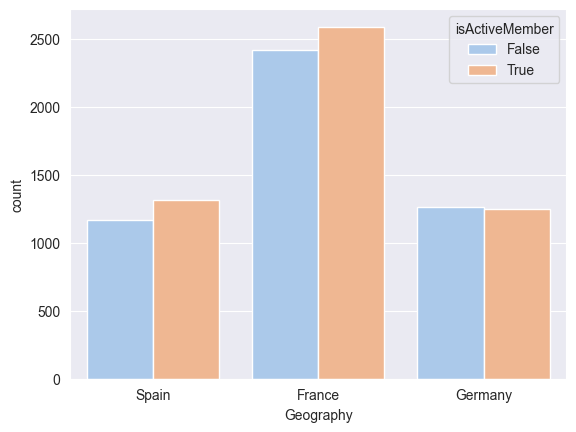

In [31]:
sns.countplot(x='Geography', data=df, hue='isActiveMember')

**Insights :**

- Number of Active accounts is **slightly higher** than Inactive accounts.
- Germany has **more Inactive account** than Active ones.

#### 4.3.6 Number of accounts vs Tenure

c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
c:\Users\Aryan\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)


<Axes: xlabel='Tenure', ylabel='count'>

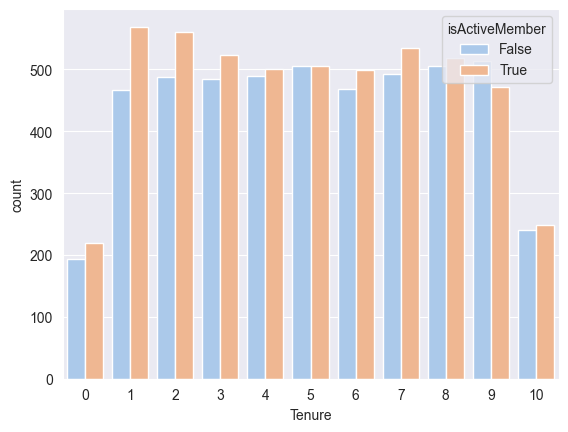

In [32]:
sns.countplot(x='Tenure', data=df, hue='isActiveMember')

**Insight :**

- Overall number of active customers is higher than inactive customers, but in Tenure 5 number of Inactive accouunts is kindly same as Active ones.
- Customers with Tenure of 1 and 2 year have huge gap between number of Active accounts and Inactive accounts.

### 4.4 Credit Score distribution

<Axes: xlabel='Age', ylabel='CreditScore'>

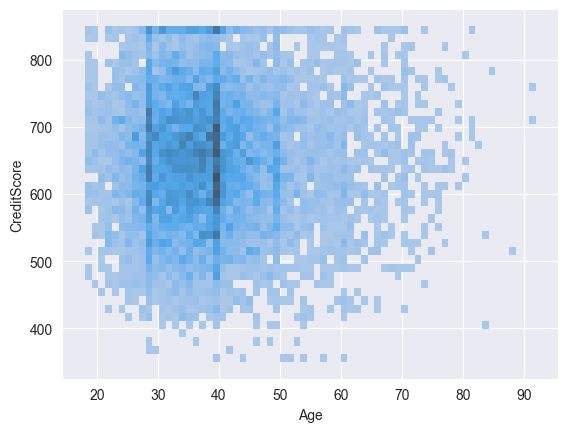

In [33]:
sns.histplot(x='Age', y='CreditScore', data=df)

In [34]:
df.pivot_table(index='Age',columns='Gender',values='CreditScore',aggfunc='mean',fill_value='-')

Gender,Female,Male
Age,,
18,673.5,689.611111
19,678.111111,659.388889
20,651.0,671.814815
21,634.727273,668.0
22,623.380952,649.714286
23,650.214286,663.350877
24,666.016667,643.444444
25,641.463768,643.917647
26,656.787234,641.688679


**Insights :**

- Accounts with Age between 30 to 50 year has more Credit score than org

### 4.5 Top 10 Series

7649    250898
5995    238388
5941    222268
239     221533
805     216110
1319    214347
1131    213146
8154    212778
2138    212696
8593    212693
Name: Balance, dtype: int64

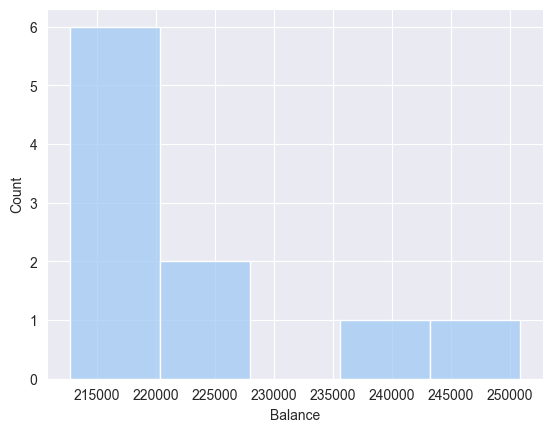

In [53]:
top_10_balance = df.sort_values('Balance', ascending=False)['Balance'].head(10)
# plt.bar(top_10_balance.index,top_10_balance.values)
sns.histplot(top_10_balance)
top_10_balance